# **PART 1 : IMPORT The LIBRARIES**

In [121]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import KBinsDiscretizer

In [122]:
# Load the dataset
file_path = 'datasets/answers.csv'
df_1 = pd.read_csv(file_path)
df_1.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


This data set represent answers, each row contains the of the answer, the content, the score and if it correct or not.
Some row got the same id but different contents which means they are answers to same question and variant score. this could only set the goal to be the following:
 The goal is to predict the score of the answers to know if it is correct or not.


# **PART 2 : Exploring and Cleaning The Dataset**


In [123]:
# Display the first few rows
print(df_1.head())

# Display basic statistics
print(df_1.describe())

# Display data types and missing values
print(df_1.info())

    id                                             answer  score  correct
0  1.1  High risk problems are address in the prototyp...    3.5      0.0
1  1.1  To simulate portions of the desired final prod...    5.0      1.0
2  1.1  A prototype program simulates the behaviors of...    4.0      1.0
3  1.1  Defined in the Specification phase a prototype...    5.0      1.0
4  1.1  It is used to let the users have a first idea ...    3.0      0.0
                id        score      correct
count  2442.000000  2442.000000  2442.000000
mean      7.202211     4.190571     0.725225
std       3.688497     1.112038     0.446492
min       1.100000     0.000000     0.000000
25%       3.700000     3.500000     0.000000
50%       7.400000     5.000000     1.000000
75%      10.600000     5.000000     1.000000
max      12.900000     5.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  --

In [124]:
# Remove duplicates
df_1 = df_1.drop_duplicates()

In [125]:
# Count the number of answers for each id
answer_counts = df_1['id'].value_counts()
print(df_1.head())

    id                                             answer  score  correct
0  1.1  High risk problems are address in the prototyp...    3.5      0.0
1  1.1  To simulate portions of the desired final prod...    5.0      1.0
2  1.1  A prototype program simulates the behaviors of...    4.0      1.0
3  1.1  Defined in the Specification phase a prototype...    5.0      1.0
4  1.1  It is used to let the users have a first idea ...    3.0      0.0


In [126]:
# Check for missing values
print(df_1.isnull().sum())

id         0
answer     0
score      0
correct    0
dtype: int64


In [127]:
# Drop 'correct' and 'id' columns
df = df_1.drop(columns=['correct', 'id'])
df

,answer,score
0,High risk problems are address in the prototyp...,3.5
1,To simulate portions of the desired final prod...,5.0
2,A prototype program simulates the behaviors of...,4.0
3,Defined in the Specification phase a prototype...,5.0
4,It is used to let the users have a first idea ...,3.0
...,...,...
2436,"three steps visit the root node, then go to ri...",2.5
2438,minus 1 divided by 2,1.5
2439,2n-1,2.5
2440,"it takes at most h steps, where h is the heigh...",5.0


# **PART 3 : Establishing a preprocessing NLP pipeline**

In [128]:
# 1. Tokenization
df['tokenized'] = df['answer'].apply(word_tokenize)
df

,answer,score,tokenized
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ..."
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin..."
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi..."
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr..."
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f..."
...,...,...,...
2436,"three steps visit the root node, then go to ri...",2.5,"[three, steps, visit, the, root, node, ,, then..."
2438,minus 1 divided by 2,1.5,"[minus, 1, divided, by, 2]"
2439,2n-1,2.5,[2n-1]
2440,"it takes at most h steps, where h is the heigh...",5.0,"[it, takes, at, most, h, steps, ,, where, h, i..."


In [129]:
# 2. Stop words removal
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df


,answer,score,tokenized,tokens_no_stopwords
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ...","[High, risk, problems, address, prototype, pro..."
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin...","[simulate, portions, desired, final, product, ..."
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behaviors, por..."
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr...","[Defined, Specification, phase, prototype, sti..."
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f...","[used, let, users, first, idea, completed, pro..."
...,...,...,...,...
2436,"three steps visit the root node, then go to ri...",2.5,"[three, steps, visit, the, root, node, ,, then...","[three, steps, visit, root, node, ,, go, right..."
2438,minus 1 divided by 2,1.5,"[minus, 1, divided, by, 2]","[minus, 1, divided, 2]"
2439,2n-1,2.5,[2n-1],[2n-1]
2440,"it takes at most h steps, where h is the heigh...",5.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[takes, h, steps, ,, h, height, tree, .]"


In [130]:
# 3. Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df


,answer,score,tokenized,tokens_no_stopwords,stemmed
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ...","[High, risk, problems, address, prototype, pro...","[high, risk, problem, address, prototyp, progr..."
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin...","[simulate, portions, desired, final, product, ...","[simul, portion, desir, final, product, quick,..."
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behaviors, por...","[prototyp, program, simul, behavior, portion, ..."
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr...","[Defined, Specification, phase, prototype, sti...","[defin, specif, phase, prototyp, stimul, behav..."
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f...","[used, let, users, first, idea, completed, pro...","[use, let, user, first, idea, complet, program..."
...,...,...,...,...,...
2436,"three steps visit the root node, then go to ri...",2.5,"[three, steps, visit, the, root, node, ,, then...","[three, steps, visit, root, node, ,, go, right...","[three, step, visit, root, node, ,, go, right,..."
2438,minus 1 divided by 2,1.5,"[minus, 1, divided, by, 2]","[minus, 1, divided, 2]","[minu, 1, divid, 2]"
2439,2n-1,2.5,[2n-1],[2n-1],[2n-1]
2440,"it takes at most h steps, where h is the heigh...",5.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[takes, h, steps, ,, h, height, tree, .]","[take, h, step, ,, h, height, tree, .]"


In [131]:
#  Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df


,answer,score,tokenized,tokens_no_stopwords,stemmed,lemmatized
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ...","[High, risk, problems, address, prototype, pro...","[high, risk, problem, address, prototyp, progr...","[High, risk, problem, address, prototype, prog..."
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin...","[simulate, portions, desired, final, product, ...","[simul, portion, desir, final, product, quick,...","[simulate, portion, desired, final, product, q..."
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behaviors, por...","[prototyp, program, simul, behavior, portion, ...","[prototype, program, simulates, behavior, port..."
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr...","[Defined, Specification, phase, prototype, sti...","[defin, specif, phase, prototyp, stimul, behav...","[Defined, Specification, phase, prototype, sti..."
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f...","[used, let, users, first, idea, completed, pro...","[use, let, user, first, idea, complet, program...","[used, let, user, first, idea, completed, prog..."
...,...,...,...,...,...,...
2436,"three steps visit the root node, then go to ri...",2.5,"[three, steps, visit, the, root, node, ,, then...","[three, steps, visit, root, node, ,, go, right...","[three, step, visit, root, node, ,, go, right,...","[three, step, visit, root, node, ,, go, right,..."
2438,minus 1 divided by 2,1.5,"[minus, 1, divided, by, 2]","[minus, 1, divided, 2]","[minu, 1, divid, 2]","[minus, 1, divided, 2]"
2439,2n-1,2.5,[2n-1],[2n-1],[2n-1],[2n-1]
2440,"it takes at most h steps, where h is the heigh...",5.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[takes, h, steps, ,, h, height, tree, .]","[take, h, step, ,, h, height, tree, .]","[take, h, step, ,, h, height, tree, .]"


we can notice the difference between stemmed column words and lemmatized, where as lemmatized is more correct and precise, so later on we will go on with it rather than stemmed 

In [132]:
# 5. Discretization 
df['answer_length'] = df['answer'].apply(len)
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['answer_length_binned'] = kbins.fit_transform(df[['answer_length']])
df

C:\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,answer,score,tokenized,tokens_no_stopwords,stemmed,lemmatized,answer_length,answer_length_binned
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ...","[High, risk, problems, address, prototype, pro...","[high, risk, problem, address, prototyp, progr...","[High, risk, problem, address, prototype, prog...",191,1.0
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin...","[simulate, portions, desired, final, product, ...","[simul, portion, desir, final, product, quick,...","[simulate, portion, desired, final, product, q...",202,1.0
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behaviors, por...","[prototyp, program, simul, behavior, portion, ...","[prototype, program, simulates, behavior, port...",116,0.0
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr...","[Defined, Specification, phase, prototype, sti...","[defin, specif, phase, prototyp, stimul, behav...","[Defined, Specification, phase, prototype, sti...",251,1.0
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f...","[used, let, users, first, idea, completed, pro...","[use, let, user, first, idea, complet, program...","[used, let, user, first, idea, completed, prog...",229,1.0
...,...,...,...,...,...,...,...,...
2436,"three steps visit the root node, then go to ri...",2.5,"[three, steps, visit, the, root, node, ,, then...","[three, steps, visit, root, node, ,, go, right...","[three, step, visit, root, node, ,, go, right,...","[three, step, visit, root, node, ,, go, right,...",106,0.0
2438,minus 1 divided by 2,1.5,"[minus, 1, divided, by, 2]","[minus, 1, divided, 2]","[minu, 1, divid, 2]","[minus, 1, divided, 2]",20,0.0
2439,2n-1,2.5,[2n-1],[2n-1],[2n-1],[2n-1],4,0.0
2440,"it takes at most h steps, where h is the heigh...",5.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[takes, h, steps, ,, h, height, tree, .]","[take, h, step, ,, h, height, tree, .]","[take, h, step, ,, h, height, tree, .]",60,0.0


# **PART 4 : Encode My Data vectors**

In [133]:
# Importing necessary libraries for encoding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

In [134]:
# Combine tokens back into a single string for each answer
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df.head()


,answer,score,tokenized,tokens_no_stopwords,stemmed,lemmatized,answer_length,answer_length_binned,lemmatized_text
0,High risk problems are address in the prototyp...,3.5,"[High, risk, problems, are, address, in, the, ...","[High, risk, problems, address, prototype, pro...","[high, risk, problem, address, prototyp, progr...","[High, risk, problem, address, prototype, prog...",191,1.0,High risk problem address prototype program ma...
1,To simulate portions of the desired final prod...,5.0,"[To, simulate, portions, of, the, desired, fin...","[simulate, portions, desired, final, product, ...","[simul, portion, desir, final, product, quick,...","[simulate, portion, desired, final, product, q...",202,1.0,simulate portion desired final product quick e...
2,A prototype program simulates the behaviors of...,4.0,"[A, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behaviors, por...","[prototyp, program, simul, behavior, portion, ...","[prototype, program, simulates, behavior, port...",116,0.0,prototype program simulates behavior portion d...
3,Defined in the Specification phase a prototype...,5.0,"[Defined, in, the, Specification, phase, a, pr...","[Defined, Specification, phase, prototype, sti...","[defin, specif, phase, prototyp, stimul, behav...","[Defined, Specification, phase, prototype, sti...",251,1.0,Defined Specification phase prototype stimulat...
4,It is used to let the users have a first idea ...,3.0,"[It, is, used, to, let, the, users, have, a, f...","[used, let, users, first, idea, completed, pro...","[use, let, user, first, idea, complet, program...","[used, let, user, first, idea, completed, prog...",229,1.0,used let user first idea completed program all...


Applying Bag of Words encoding using CountVectorizer

In [135]:
# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['lemmatized_text'])
print(X_bow)


  (0, 947)	1
  (0, 1840)	1
  (0, 1612)	1
  (0, 79)	1
  (0, 1651)	2
  (0, 1626)	2
  (0, 1250)	1
  (0, 2095)	1
  (0, 804)	1
  (0, 1268)	1
  (0, 111)	1
  (0, 2243)	1
  (0, 1927)	1
  (0, 364)	1
  (0, 1974)	1
  (0, 1570)	1
  (0, 1631)	1
  (1, 1612)	1
  (1, 1626)	1
  (1, 1268)	1
  (1, 1951)	1
  (1, 1564)	1
  (1, 568)	1
  (1, 816)	2
  (1, 1623)	1
  :	:
  (2336, 2152)	1
  (2336, 1844)	1
  (2336, 1151)	1
  (2336, 1366)	1
  (2336, 2080)	3
  (2336, 2280)	2
  (2336, 2282)	1
  (2337, 1302)	1
  (2337, 615)	1
  (2338, 16)	1
  (2339, 2107)	1
  (2339, 2039)	1
  (2339, 2195)	1
  (2339, 937)	1
  (2340, 202)	1
  (2340, 109)	1
  (2340, 303)	2
  (2340, 546)	1
  (2340, 2294)	1
  (2340, 1772)	1
  (2340, 1875)	1
  (2340, 2195)	1
  (2340, 1366)	1
  (2340, 1600)	1
  (2340, 1057)	1


Applying TF-IDF encoding using TfidfVectorizer

In [136]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['lemmatized_text'])
print(X_tfidf)

  (0, 1631)	0.2779389837325386
  (0, 1570)	0.2527889975290936
  (0, 1974)	0.21720082394487336
  (0, 364)	0.2926507825552084
  (0, 1927)	0.22763901132564862
  (0, 2243)	0.15218905271531358
  (0, 111)	0.16747226114850167
  (0, 1268)	0.1887993716489227
  (0, 804)	0.2926507825552084
  (0, 2095)	0.24719583120073124
  (0, 1250)	0.1788832617699458
  (0, 1626)	0.275460206840471
  (0, 1651)	0.347487296703917
  (0, 79)	0.1475810263681409
  (0, 1612)	0.16523870930977352
  (0, 1840)	0.2779389837325386
  (0, 947)	0.2926507825552084
  (1, 1639)	0.26645548761128596
  (1, 1976)	0.19714952467727812
  (1, 1882)	0.21287166379562955
  (1, 939)	0.2423446135364754
  (1, 2292)	0.17383833268226553
  (1, 1113)	0.21823373946166488
  (1, 1998)	0.18200714295380577
  (1, 1967)	0.22457572889806607
  :	:
  (2336, 1366)	0.12485817373844774
  (2336, 1151)	0.15885575644019748
  (2336, 1844)	0.16897180721773988
  (2336, 2152)	0.2585000447877819
  (2336, 896)	0.1952479434236421
  (2336, 1835)	0.3160438701796723
  (2336, 

In [137]:
# Word2Vec
# Using the lemmatized tokens
sentences = df['lemmatized'].tolist()
print(sentences)

[['High', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', '.', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed', '.'], ['simulate', 'portion', 'desired', 'final', 'product', 'quick', 'easy', 'program', 'small', 'specific', 'job', '.', 'way', 'help', 'see', 'problem', 'may', 'solve', 'final', 'project', '.'], ['prototype', 'program', 'simulates', 'behavior', 'portion', 'desired', 'software', 'product', 'allow', 'error', 'checking', '.'], ['Defined', 'Specification', 'phase', 'prototype', 'stimulates', 'behavior', 'portion', 'desired', 'software', 'product', '.', 'Meaning', ',', 'role', 'prototype', 'temporary', 'solution', 'program', 'refined', 'used', 'extensively', 'problem', 'solving', '.'], ['used', 'let', 'user', 'first', 'idea', 'completed', 'program', 'allow', 'client', 'evaluate', 'program', '.', 'generate', 'much', 'feedback', 'including', 'software', 'specification', 'project', 'estimation'

Trains Word2Vec models for both CBOW and Skip-gram methods

In [138]:
# CBOW
w2v_model_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
X_cbow = [np.mean([w2v_model_cbow.wv[word] for word in tokens if word in w2v_model_cbow.wv] or [np.zeros(100)], axis=0) for tokens in sentences]
print(X_cbow)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [139]:
# Skip-gram
w2v_model_skipgram = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
X_skipgram = [np.mean([w2v_model_skipgram.wv[word] for word in tokens if word in w2v_model_skipgram.wv] or [np.zeros(100)], axis=0) for tokens in sentences]
print(X_skipgram)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Converts the encoded vectors to DataFrames for easy handling and verification of shapes

In [140]:
# Convert to DataFrame for easy handling
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_cbow = pd.DataFrame(X_cbow)
df_skipgram = pd.DataFrame(X_skipgram)

In [141]:
# Displaying the shape of the encoded dataframes
df_bow.shape, df_tfidf.shape, df_cbow.shape, df_skipgram.shape

((2341, 2335), (2341, 2335), (2341, 100), (2341, 100))

# **PART 5 : Training Models**


In [142]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Prepare the data: target and features
X = df_cbow  # Using CBOW embeddings as an example; can switch to df_skipgram for Skip-gram embeddings
y = df_1['correct']  # Replace 'target' with the actual target column name

In [144]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:
# SVR Model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

### Naive Bayes Model
Note: Naive Bayes generally works with discrete features like those from Bag of Words or TF-IDF,
so it's not directly applicable with continuous embeddings like Word2Vec.


In [146]:
# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_lr = linear_reg_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [147]:
# Decision Tree Model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [148]:
# Print the results
print("Comparison of Encoding Methods and Model Performance:")
print("-----------------------------------------------------")
print(f"SVR Model Mean Squared Error: {mse_svr}")
print(f"Linear Regression Model Mean Squared Error: {mse_lr}")
print(f"Decision Tree Model Mean Squared Error: {mse_tree}")

Comparison of Encoding Methods and Model Performance:
-----------------------------------------------------
SVR Model Mean Squared Error: 0.21960714239323503
Linear Regression Model Mean Squared Error: 0.2016139394478168
Decision Tree Model Mean Squared Error: 0.40245202558635396


In [149]:
# Visualization of model performance
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Predicted Values')

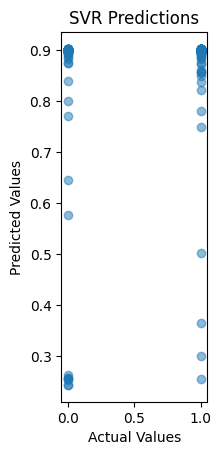

In [150]:
# Plotting SVR predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('SVR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

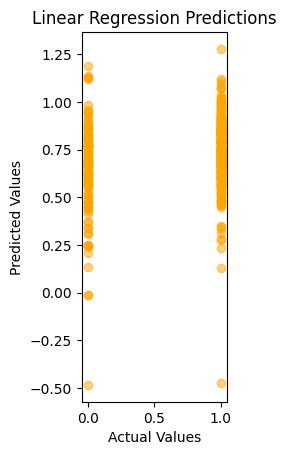

In [151]:
# Plotting Linear Regression predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='orange')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

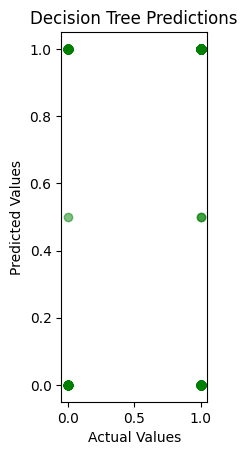

In [152]:
# Plotting Decision Tree predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.title('Decision Tree Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [153]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

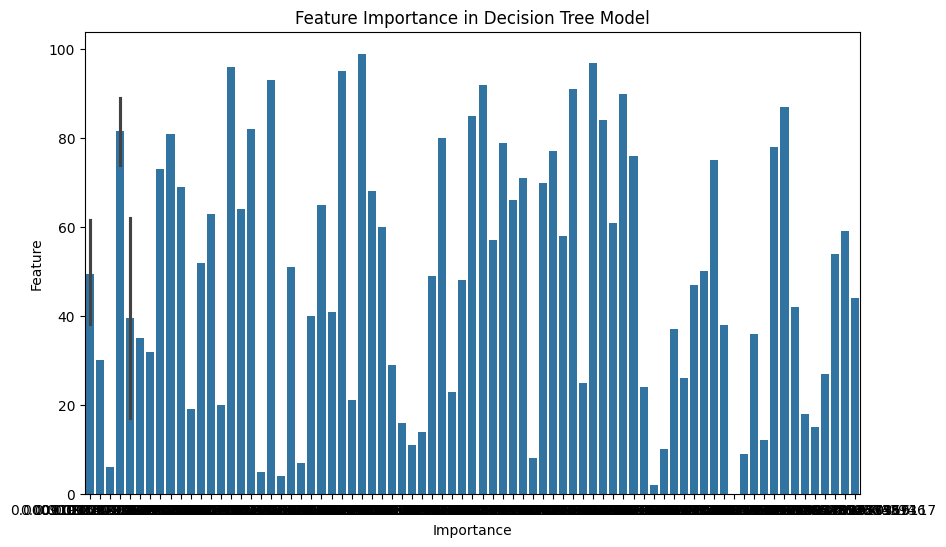

In [154]:
# Visualization of feature importance (for Decision Tree)
importance = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


1. Bag of Words:
   - Simplicity: Easy to implement and interpret.
   - Limitation: Does not capture semantic meaning, only word frequency.

2. TF-IDF:
   - Improvement: Accounts for the importance of words in documents.
   - Limitation: Still lacks semantic understanding.

3. Word2Vec (CBOW and Skip-gram):
   - Semantic Representation: Captures the meaning of words in context.
   - Advantage: Provides dense and continuous representations useful for deep learning models.
   - CBOW vs. Skip-gram: 
       * CBOW is faster and works well with frequent words.
       * Skip-gram performs better with infrequent words but is computationally intensive.

4. Model Performance with Word2Vec:
   - SVR: Handles continuous outputs, performs well but computationally intensive.
   - Linear Regression: Simple and interpretable, but might underperform with complex data.
   - Decision Tree: Flexible and captures non-linear relationships, but prone to overfitting.
